<a href="https://colab.research.google.com/github/tonu1990/AI_CV_Projects/blob/main/PersonTracking_Video_ByteTrack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Built-in YOLOv8 Tracking (model.track())**

* Ultralytics YOLOv8 has a built-in object tracker that simplifies tracking directly within the YOLO inference pipeline.
* By default, it uses ByteTrack under the hood.

In [ ]:
! pip install ultralytics

In [3]:
import cv2
import os
import tempfile
from ultralytics import YOLO
from google.colab import files
from IPython.display import display, HTML

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# upload video file

print("Please upload the video file")
file_upload = files.upload()



Please upload the video file


Saving Turnstile_1.mp4 to Turnstile_1.mp4


In [5]:
# load yolo model

model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 94.2MB/s]


We read the video and perform Object detection and traking using model.track().

* We will keep only Person class , and will filter out all other remaining classes

In [ ]:
video_file_name = list(file_upload.keys())[0]
# Open the video
cap = cv2.VideoCapture(video_file_name)

# Open the uploaded video
cap = cv2.VideoCapture(video_file_name)
fps = int(cap.get(cv2.CAP_PROP_FPS))
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Load YOLO model
model = YOLO('yolov8n.pt')

# Create a temporary output video file
output_path = os.path.join(tempfile.gettempdir(), "output.mp4")
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for MP4 format
out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width, frame_height))

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Object detection and tracking
    results = model.track(frame, persist=True)

    # Extract detected classes
    detected_classes = results[0].boxes.cls.cpu().numpy() if results[0].boxes is not None else []

    # Keep only "person" class (ID 0)
    if len(detected_classes) > 0:
        person_indices = [i for i, cls in enumerate(detected_classes) if cls == 0]
        results[0].boxes = results[0].boxes[person_indices]  # Keep only persons

    # Plot results
    frame = results[0].plot()

    # Write the processed frame to the output video
    out.write(frame)

cap.release()
out.release()

# Download the video file to your local machine
files.download(output_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Results from Downloaded Video**

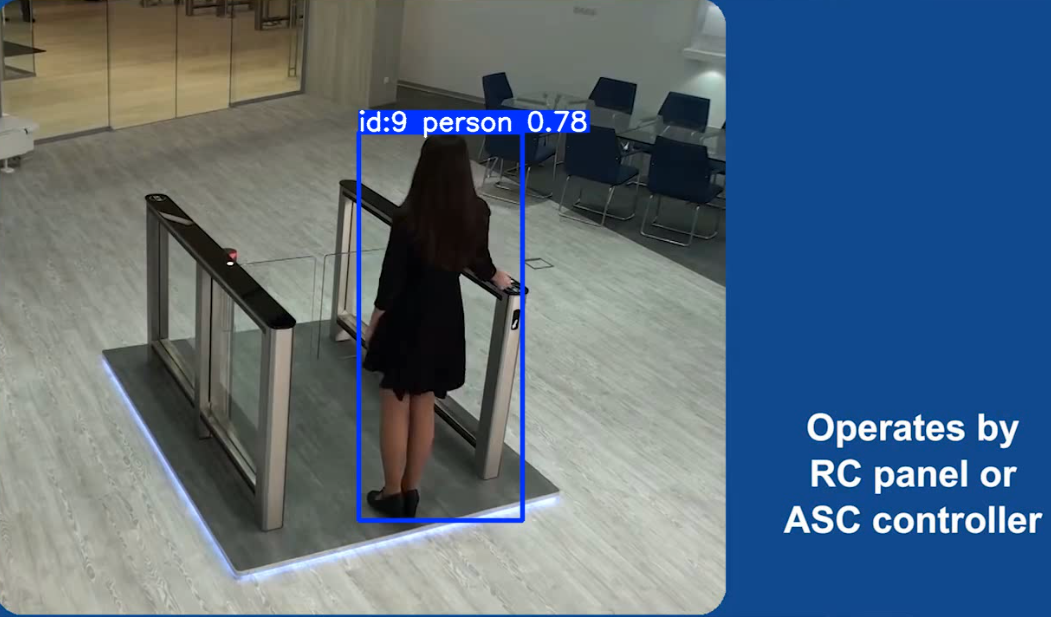

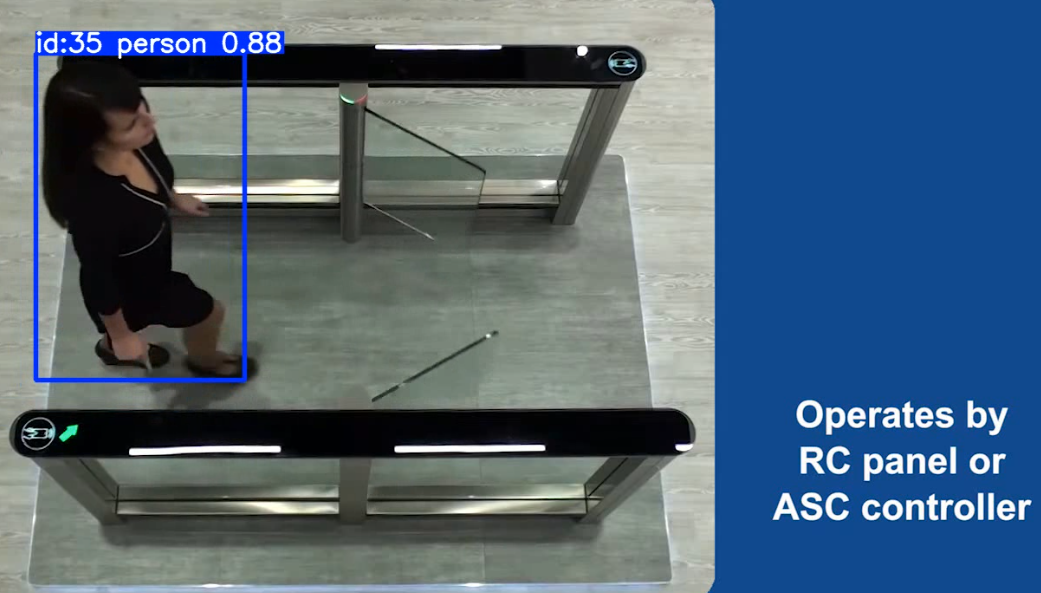

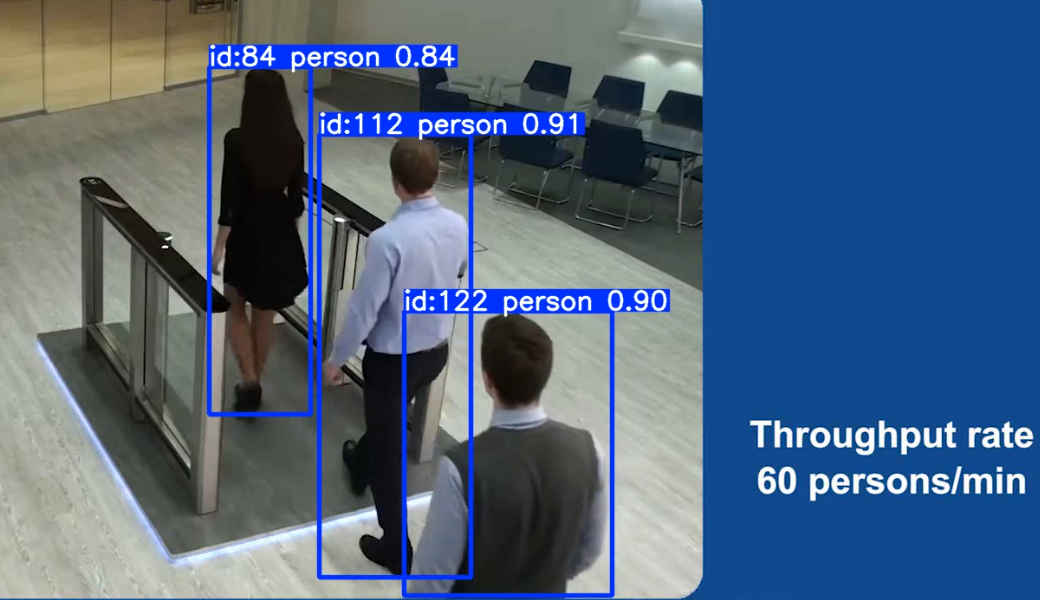